##### Copyright 2022 The Cirq Developers

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# QVM Creation Template

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/simulate/qvm_builder_code"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/simulate/qvm_builder_code.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/simulate/qvm_builder_code.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/simulate/qvm_builder_code.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

This notebook includes a couple of clean and succinct code blocks that you can build on or copy and paste elsewhere in order to make use of the [Quantum Virtual Machine](/cirq/simulate/quantum_virtual_machine) without worrying about how it works inside. 

## **Install** Cirq and qsim

In [5]:
# @title Install `cirq_google` and `qsimcirq`

try:
    import cirq
    import cirq_google
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq-google
    print("installed cirq.")
    import cirq
    import cirq_google

try:
    import qsimcirq
except ImportError:
    print("installing qsimcirq...")
    !pip install --quiet qsimcirq
    print(f"installed qsimcirq.")
    import qsimcirq

import time

## Create a **Quantum Virtual Machine**.

Instantiate a `cirq.SimulatedLocalEngine` that uses the [Virtual Engine Interface](/cirq/simulate/virtual_engine_interface).

In [6]:
# @title Choose a processor ("rainbow" or "weber")
processor_id = "rainbow"  # @param {type:"string"}

# Instantiate an engine.
sim_engine = cirq_google.engine.create_default_noisy_quantum_virtual_machine(
    processor_id=processor_id, simulator_class=qsimcirq.QSimSimulator
)
print(
    "Your quantum virtual machine",
    processor_id,
    "is ready, here is the qubit grid:",
    "\n========================\n",
)
print(sim_engine.get_processor(processor_id).get_device())

Your quantum virtual machine rainbow is ready, here is the qubit grid: 

                  (3, 2)
                  │
                  │
         (4, 1)───(4, 2)───(4, 3)
         │        │        │
         │        │        │
(5, 0)───(5, 1)───(5, 2)───(5, 3)───(5, 4)
         │        │        │        │
         │        │        │        │
         (6, 1)───(6, 2)───(6, 3)───(6, 4)───(6, 5)
                  │        │        │        │
                  │        │        │        │
                  (7, 2)───(7, 3)───(7, 4)───(7, 5)───(7, 6)
                           │        │        │
                           │        │        │
                           (8, 3)───(8, 4)───(8, 5)
                                    │
                                    │
                                    (9, 4)


In [8]:
import cirq_google as cg
import qsimcirq

# In VM: Transform circuit and Translate all gates to the type gates the device supports
def GHZ_5q(num_qubits,measurements=True):
    myqubits = cirq.LineQubit.range(num_qubits)
    GHZ_circuit = cirq.Circuit([
        cirq.Moment([cirq.H(myqubits[0])])
    ])

    for x in range(num_qubits-1):
        GHZ_circuit.append([cirq.CNOT(myqubits[x],myqubits[x+1])])

    if measurements:
        GHZ_circuit.append(cirq.Moment(cirq.measure_each(*myqubits)))
    return GHZ_circuit
GHZ_5q_traslated = cirq.optimize_for_target_gateset(
    GHZ_5q(5),
    context=cirq.TransformerContext(deep=True),
    gateset=cirq.SqrtIswapTargetGateset(),
)


In [9]:
device_qubit_chain = [
    cirq.GridQubit(5,2),
    cirq.GridQubit(5,3),
    cirq.GridQubit(4,3),
    cirq.GridQubit(4,2),
    cirq.GridQubit(4,1),
]

In [11]:
myqubits = cirq.LineQubit.range(5)

In [12]:
qubit_map = dict(zip(myqubits,device_qubit_chain))
GHZ_5q_deviceready = GHZ_5q_traslated.transform_qubits(lambda q: qubit_map[q])

print(GHZ_5q_deviceready)

(4, 1): ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────PhXZ(a=-1.0,x=0.25,z=-0.5)─────────iSwap──────────────────────────────iSwap───────PhXZ(a=-0.5,x=0.75,z=0.5)───M('q(4)')───
                                                                                                                                                                                                                                                                                              │                                  │
(4, 2): ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────PhXZ(a=-1.0,x=0.25,z=-0.5)─────────iSwap──────────────────────────────iSwap───────PhXZ(a=0.804,x=0.667,z=1.09e-08)───iSwap^0.5───PhXZ(

q(0)=00000011001011111001101011101000000101110011101111100111111010111001100100011011000010000000010010001100001011100010010000111001001101101100111011100010111100100110111110011101110111101101010001111100101010110000111000000011111010101111100111011001110101111101011100011001101000110000011011110010010110000011000011110101010100110001100110011010011111011011101100001101110000111011011111101001000011111000011110000111111110001011100110110001000010011000010110001000110001000000011110110001101001001101110111010101011001110010001101001000001000001011011111000110010010011101010001001101001101100100100011001011100001101011010111011011111100110000100010101010001001001000100010011010110010101001001010110110000000000111100111010000011001111111011111000100011000101011000111011010100011001101011000000011000011110001110101011010011100110001110100111000101010011111011010111010010010110000001010100011010001011010001101111110101101010001010110011001110110111011110111101111000110101111000111111100011

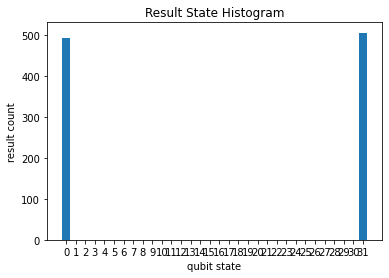

In [13]:
sim=cirq.Simulator()
result=sim.run(GHZ_5q_deviceready,repetitions=1000) # sampling
print(result)
cirq.plot_state_histogram(result)

In [ ]:
cirq.plot_state_histogram()

## **Create** a device-ready circuit.

To learn how to create a device ready circuit, have a look at the [QVM Circuit Preparation](/cirq/simulate/qvm_basic_example) page.

In [ ]:
# create your device ready circuit here!
q0 = cirq.GridQubit(4, 1)
your_circuit = cirq.Circuit([(cirq.X**0.5)(q0), cirq.measure(q0)])
print(your_circuit)

## **Execute** Your circuit on the Quantum Virtual Machine.

In [ ]:
# @title Enter the name of your device ready circuit and execute it on the Quantum Virtual Machine
circuit = your_circuit  # @param

reps = 3000
start = time.time()
results = sim_engine.get_sampler(processor_id).run(circuit, repetitions=reps)
elapsed = time.time() - start

print('Circuit successfully executed on your quantum virtual machine', processor_id)
print(f'QVM runtime: {elapsed:.04g}s ({reps} reps)')
print('You can now print or plot "results"')